**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [57]:
# Write your code here
import numpy as np
from types import SimpleNamespace
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [58]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [71]:
import numpy as np
import pandas as pd
from types import SimpleNamespace

# Define parameters
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.tau = 0.0
par.T = 0.0

# Define functions
def optimal_labor(w, p, A, gamma):
    return (p * A**gamma / w)**(1 / (1 - gamma))

def optimal_output(A, l, gamma):
    return A * l**gamma

def firm_profit(w, p, A, gamma):
    return w * (p * A**gamma / w)**(1 - gamma) * (1 - gamma)

def consumer_utility(p1, p2, w, T, pi1, pi2, alpha, nu, epsilon):
    c1 = alpha * (w + T + pi1 + pi2) / p1
    c2 = (1 - alpha) * (w + T + pi1 + pi2) / (p2 + par.tau)
    l = ((c1**alpha * c2**(1 - alpha))**(1 / nu))**(1 / (1 + epsilon))
    return c1, c2, l

# Market clearing conditions
def market_clearing(p1, p2, w, par):
    # Firm 1
    l1 = optimal_labor(w, p1, par.A, par.gamma)
    y1 = optimal_output(par.A, l1, par.gamma)
    pi1 = firm_profit(w, p1, par.A, par.gamma)
    
    # Firm 2
    l2 = optimal_labor(w, p2, par.A, par.gamma)
    y2 = optimal_output(par.A, l2, par.gamma)
    pi2 = firm_profit(w, p2, par.A, par.gamma)
    
    # Consumer
    c1, c2, l = consumer_utility(p1, p2, w, par.T, pi1, pi2, par.alpha, par.nu, par.epsilon)
    
    # Market clearing
    labor_clearing = l1 + l2 - l
    good1_clearing = y1 - c1
    good2_clearing = y2 - c2
    
    return labor_clearing, good1_clearing, good2_clearing

# Prices
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

# Check market clearing conditions for each combination of p1 and p2
results = []
for p1 in p1_values:
    for p2 in p2_values:
        labor_clearing, good1_clearing, good2_clearing = market_clearing(p1, p2, 1, par)
        results.append({
            'p1': p1,
            'p2': p2,
            'labor_clearing': labor_clearing,
            'good1_clearing': good1_clearing,
            'good2_clearing': good2_clearing
        })

# Create DataFrame for results
df_results = pd.DataFrame(results)

# Display DataFrame
print(df_results)


          p1        p2  labor_clearing  good1_clearing  good2_clearing
0   0.100000  0.100000       -1.906099       -3.848683       -9.113594
1   0.100000  0.311111       -1.415066       -4.211002       -2.922140
2   0.100000  0.522222       -1.091209       -4.458316       -1.514472
3   0.100000  0.733333       -0.739855       -4.658865       -0.780851
4   0.100000  0.944444       -0.326397       -4.832080       -0.274069
5   0.100000  1.155556        0.161291       -4.986793        0.128415
6   0.100000  1.366667        0.728788       -5.127909        0.474097
7   0.100000  1.577778        1.379091       -5.258486        0.785326
8   0.100000  1.788889        2.113980       -5.380582        1.074030
9   0.100000  2.000000        2.934597       -5.495662        1.347173
10  0.311111  0.100000       -1.663709       -1.074568       -9.959004
11  0.311111  0.311111       -1.202031       -1.191027       -3.193879
12  0.311111  0.522222       -0.888677       -1.270521       -1.676359
13  0.

In [74]:
import numpy as np
from scipy.optimize import fsolve
from types import SimpleNamespace

# Define parameters
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.tau = 0.0
par.T = 0.0

# Define functions
def optimal_labor(w, p, A, gamma):
    return (p * A**gamma / w)**(1 / (1 - gamma))

def optimal_output(A, l, gamma):
    return A * l**gamma

def firm_profit(w, p, A, gamma):
    return w * (p * A**gamma / w)**(1 - gamma) * (1 - gamma)

def consumer_utility(p1, p2, w, T, pi1, pi2, alpha, nu, epsilon):
    c1 = alpha * (w + T + pi1 + pi2) / p1
    c2 = (1 - alpha) * (w + T + pi1 + pi2) / (p2 + par.tau)
    l = ((c1**alpha * c2**(1 - alpha))**(1 / nu))**(1 / (1 + epsilon))
    return c1, c2, l

# Market clearing conditions
def market_clearing_conditions(prices, w, par):
    p1, p2 = prices
    
    # Firm 1
    l1 = optimal_labor(w, p1, par.A, par.gamma)
    y1 = optimal_output(par.A, l1, par.gamma)
    pi1 = firm_profit(w, p1, par.A, par.gamma)
    
    # Firm 2
    l2 = optimal_labor(w, p2, par.A, par.gamma)
    y2 = optimal_output(par.A, l2, par.gamma)
    pi2 = firm_profit(w, p2, par.A, par.gamma)
    
    # Consumer
    c1, c2, l = consumer_utility(p1, p2, w, par.T, pi1, pi2, par.alpha, par.nu, par.epsilon)
    
    # Market clearing
    labor_clearing = l1 + l2 - l
    good1_clearing = y1 - c1
    
    return [labor_clearing, good1_clearing]  # Check only two conditions

# Initial guess for p1 and p2
initial_guess = [1.0, 1.0]

# Solve for market clearing prices
solution = fsolve(market_clearing_conditions, initial_guess, args=(1, par))

# Display the solution
print("Market clearing prices:")
print(f"p1 = {solution[0]}")
print(f"p2 = {solution[1]}")

# Check the market clearing conditions at the solution
labor_clearing, good1_clearing = market_clearing_conditions(solution, 1, par)

# Recalculate good2_clearing at the solution
l2 = optimal_labor(1, solution[1], par.A, par.gamma)
y2 = optimal_output(par.A, l2, par.gamma)
pi1 = firm_profit(1, solution[0], par.A, par.gamma)
pi2 = firm_profit(1, solution[1], par.A, par.gamma)
c1, c2, l = consumer_utility(solution[0], solution[1], 1, par.T, pi1, pi2, par.alpha, par.nu, par.epsilon)
good2_clearing = y2 - c2

print("\nMarket clearing conditions at the solution:")
print(f"Labor clearing: {labor_clearing}")
print(f"Good 1 clearing: {good1_clearing}")
print(f"Good 2 clearing: {good2_clearing}")


Market clearing prices:
p1 = 0.7475486222511643
p2 = 0.7411786704525158

Market clearing conditions at the solution:
Labor clearing: 5.557554416668609e-12
Good 1 clearing: -2.6187940704858192e-12
Good 2 clearing: -1.0180924087834382


In [68]:
df_results.to_csv('market_clearing_conditions.csv', index=False)

In [66]:
from IPython.display import display

display(df_results)


,p1,p2,labor_clearing,good1_clearing,good2_clearing
0,0.1,0.100000,-1.906099,-3.848683,-9.113594
1,0.1,0.311111,-1.415066,-4.211002,-2.922140
2,0.1,0.522222,-1.091209,-4.458316,-1.514472
3,0.1,0.733333,-0.739855,-4.658865,-0.780851
4,0.1,0.944444,-0.326397,-4.832080,-0.274069
...,...,...,...,...,...
95,2.0,1.155556,4.371791,1.663311,-0.204148
96,2.0,1.366667,4.934827,1.656256,0.192905
97,2.0,1.577778,5.581507,1.649727,0.541758
98,2.0,1.788889,6.313371,1.643622,0.859207


**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [72]:
import numpy as np
from scipy.optimize import fsolve
from types import SimpleNamespace

# Define parameters
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.tau = 0.0
par.T = 0.0

# Define functions
def optimal_labor(w, p, A, gamma):
    return (p * A**gamma / w)**(1 / (1 - gamma))

def optimal_output(A, l, gamma):
    return A * l**gamma

def firm_profit(w, p, A, gamma):
    return w * (p * A**gamma / w)**(1 - gamma) * (1 - gamma)

def consumer_utility(p1, p2, w, T, pi1, pi2, alpha, nu, epsilon):
    c1 = alpha * (w + T + pi1 + pi2) / p1
    c2 = (1 - alpha) * (w + T + pi1 + pi2) / (p2 + par.tau)
    l = ((c1**alpha * c2**(1 - alpha))**(1 / nu))**(1 / (1 + epsilon))
    return c1, c2, l

# Market clearing conditions
def market_clearing_conditions(prices, w, par):
    p1, p2 = prices
    
    # Firm 1
    l1 = optimal_labor(w, p1, par.A, par.gamma)
    y1 = optimal_output(par.A, l1, par.gamma)
    pi1 = firm_profit(w, p1, par.A, par.gamma)
    
    # Firm 2
    l2 = optimal_labor(w, p2, par.A, par.gamma)
    y2 = optimal_output(par.A, l2, par.gamma)
    pi2 = firm_profit(w, p2, par.A, par.gamma)
    
    # Consumer
    c1, c2, l = consumer_utility(p1, p2, w, par.T, pi1, pi2, par.alpha, par.nu, par.epsilon)
    
    # Market clearing
    labor_clearing = l1 + l2 - l
    good1_clearing = y1 - c1
    
    return [labor_clearing, good1_clearing]  # Check only two conditions

# Initial guess for p1 and p2
initial_guess = [1.0, 1.0]

# Solve for market clearing prices
solution = fsolve(market_clearing_conditions, initial_guess, args=(1, par))

# Display the solution
print("Market clearing prices:")
print(f"p1 = {solution[0]}")
print(f"p2 = {solution[1]}")

# Check the market clearing conditions at the solution
labor_clearing, good1_clearing = market_clearing_conditions(solution, 1, par)
good2_clearing = optimal_output(par.A, optimal_labor(1, solution[1], par.A, par.gamma), par.gamma) - consumer_utility(solution[0], solution[1], 1, par.T, firm_profit(1, solution[0], par.A, par.gamma), firm_profit(1, solution[1], par.A, par.gamma), par.alpha, par.nu, par.epsilon)[1]

print("\nMarket clearing conditions at the solution:")
print(f"Labor clearing: {labor_clearing}")
print(f"Good 1 clearing: {good1_clearing}")
print(f"Good 2 clearing: {good2_clearing}")


Market clearing prices:
p1 = 0.7475486222511643
p2 = 0.7411786704525158

Market clearing conditions at the solution:
Labor clearing: 5.557554416668609e-12
Good 1 clearing: -2.6187940704858192e-12
Good 2 clearing: -1.0180924087834382


Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [64]:
import numpy as np
from scipy.optimize import minimize, fsolve

# Define utility functions and parameters
def utility(income):
    # Placeholder utility function: log utility
    return np.log(income)

def excess_demand(p, w):
    p1, p2 = p
    # Define the supply and demand functions (placeholders)
    # These need to be defined according to the specific economic model being used.
    supply1 = lambda p1, p2, w: p1 * 0.5  # Placeholder
    supply2 = lambda p1, p2, w: p2 * 0.5  # Placeholder
    demand1 = lambda p1, p2, w: p1 * 0.3  # Placeholder
    demand2 = lambda p1, p2, w: p2 * 0.3  # Placeholder

    excess_demand1 = demand1(p1, p2, w) - supply1(p1, p2, w)
    excess_demand2 = demand2(p1, p2, w) - supply2(p1, p2, w)

    return [excess_demand1, excess_demand2]

def find_equilibrium_prices(w):
    initial_guess = [1, 1]
    equilibrium_prices = fsolve(lambda p: excess_demand(p, w), initial_guess)
    return equilibrium_prices

# Function to calculate social welfare function (SWF)
def social_welfare_function(tau, T, w, incomes):
    # Calculate after-tax income
    after_tax_income = incomes * (1 - tau) + T
    
    # Calculate utility for each individual
    utilities = utility(after_tax_income)
    
    # Calculate social welfare function (SWF) as sum of utilities
    SWF = np.sum(utilities)
    
    return -SWF  # Negate because we will be minimizing

# Function to find optimal tau and T
def find_optimal_tau_T(w, incomes):
    # Define bounds for tau (0 to 1) and T (0 to max income)
    bounds = [(0, 1), (0, np.max(incomes))]

    # Initial guess for tau and T
    initial_guess = [0.2, 1]

    # Perform the optimization to maximize SWF
    result = minimize(lambda x: social_welfare_function(x[0], x[1], w, incomes), initial_guess, bounds=bounds)

    optimal_tau, optimal_T = result.x

    return optimal_tau, optimal_T



# Define the numeraire
w = 1  # numeraire

# Placeholder incomes
incomes = np.array([1, 2, 3, 4, 5])  # Example incomes

# Find the optimal tau and T to maximize SWF
optimal_tau, optimal_T = find_optimal_tau_T(w, incomes)

# Print the optimal values
print(f"Optimal tax rate (tau): {optimal_tau}")
print(f"Optimal transfer (T): {optimal_T}")




Optimal tax rate (tau): 0.0
Optimal transfer (T): 5.0


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [ ]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [ ]:
from Eksamen2024 import question_2_1, question_2_2, question_2_3

# Question 2.1
expected_utilities, average_realized_utilities = question_2_1()
print("Expected Utilities for each career track:", expected_utilities)
print("Average Realized Utilities for each career track:", average_realized_utilities)

Expected Utilities for each career track: [0.99572803 2.0271641  2.97350971]
Average Realized Utilities for each career track: [0.829059   1.61521255 2.90381406]


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

Career Counts: [4 1 5]
Average Prior Expected Utilities: 2.163716509770812
Average Realized Utilities: 1.651641937523094


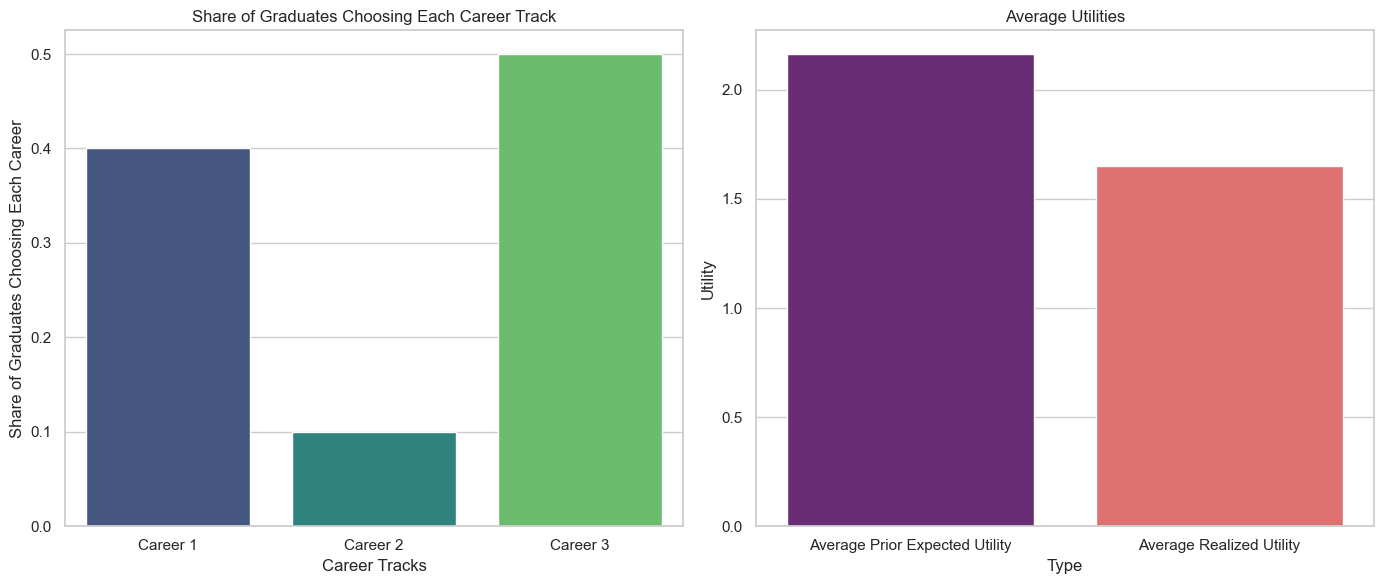

In [ ]:
# Question 2.2
choices, prior_expected_utilities, realized_utilities = question_2_2()
career_counts = np.bincount(choices, minlength=3)
average_prior_expected_utilities = np.mean(prior_expected_utilities)
average_realized_utilities = np.mean(realized_utilities)

print("Career Counts:", career_counts)
print("Average Prior Expected Utilities:", average_prior_expected_utilities)
print("Average Realized Utilities:", average_realized_utilities)

# Prepare data for visualization
df_share = pd.DataFrame({
    'Career': [f'Career {i+1}' for i in range(3)],
    'Share': career_counts / 10
})

df_utility = pd.DataFrame({
    'Type': ['Average Prior Expected Utility', 'Average Realized Utility'],
    'Utility': [average_prior_expected_utilities, average_realized_utilities]
})

# Set Seaborn style
sns.set(style="whitegrid")

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the share of graduates choosing each career
sns.barplot(x='Career', y='Share', data=df_share, palette="viridis", ax=axes[0])
axes[0].set_xlabel('Career Tracks')
axes[0].set_ylabel('Share of Graduates Choosing Each Career')
axes[0].set_title('Share of Graduates Choosing Each Career Track')

# Plot the average subjective expected utility
sns.barplot(x='Type', y='Utility', data=df_utility, palette="magma", ax=axes[1])
axes[1].set_ylabel('Utility')
axes[1].set_title('Average Utilities')

plt.tight_layout()
plt.show()

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

New Career Counts: [1 2 7]
Average New Expected Utilities: 3.39439508579981
Average New Realized Utilities: 3.4930852789498275
Share of Graduates Switching Careers: 0.5


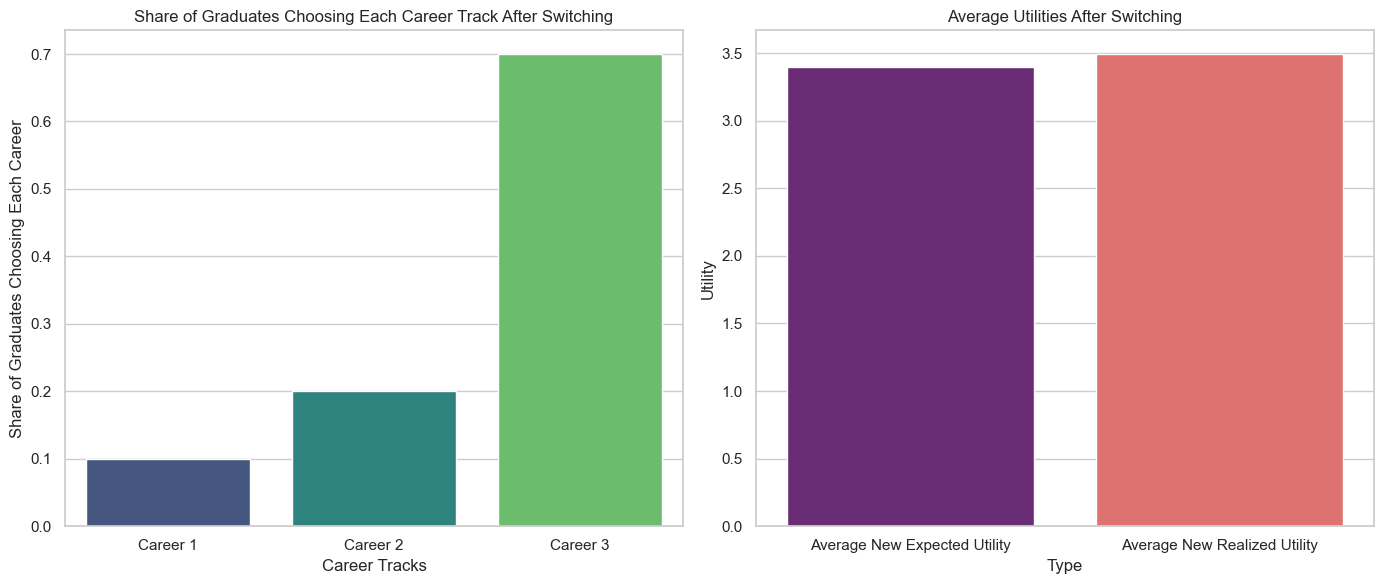

In [ ]:
# Question 2.3
new_choices, new_expected_utilities, new_realized_utilities, switch_decisions = question_2_3()
career_counts = np.bincount(new_choices, minlength=3)
average_new_expected_utilities = np.mean(new_expected_utilities)
average_new_realized_utilities = np.mean(new_realized_utilities)
switch_share = np.mean(switch_decisions)

print("New Career Counts:", career_counts)
print("Average New Expected Utilities:", average_new_expected_utilities)
print("Average New Realized Utilities:", average_new_realized_utilities)
print("Share of Graduates Switching Careers:", switch_share)

# Prepare data for visualization
df_share = pd.DataFrame({
    'Career': [f'Career {i+1}' for i in range(3)],
    'Share': career_counts / 10
})

df_utility = pd.DataFrame({
    'Type': ['Average New Expected Utility', 'Average New Realized Utility'],
    'Utility': [average_new_expected_utilities, average_new_realized_utilities]
})

# Set Seaborn style
sns.set(style="whitegrid")

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the share of graduates choosing each career after switching
sns.barplot(x='Career', y='Share', data=df_share, palette="viridis", ax=axes[0])
axes[0].set_xlabel('Career Tracks')
axes[0].set_ylabel('Share of Graduates Choosing Each Career')
axes[0].set_title('Share of Graduates Choosing Each Career Track After Switching')

# Plot the average subjective expected utility after switching
sns.barplot(x='Type', y='Utility', data=df_utility, palette="magma", ax=axes[1])
axes[1].set_ylabel('Utility')
axes[1].set_title('Average Utilities After Switching')

plt.tight_layout()
plt.show()

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [ ]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

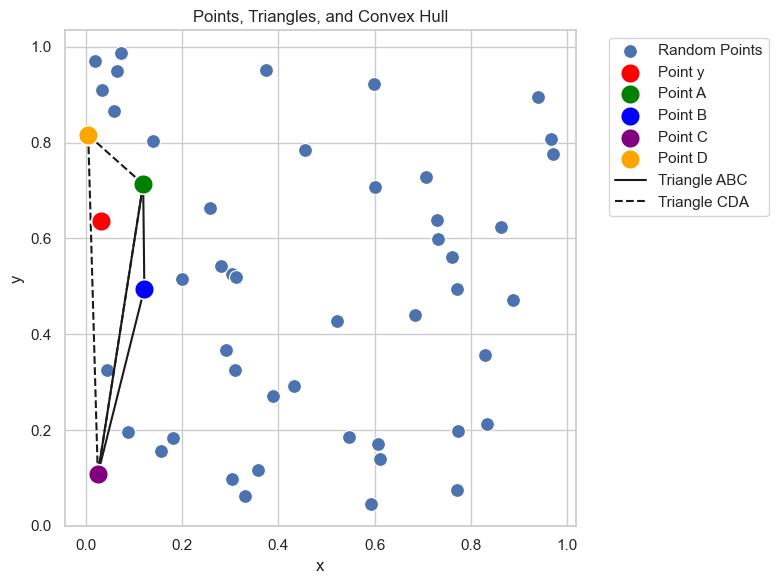

In [ ]:
from Eksamen2024 import question_3_1, question_3_2, question_3_3

# Question 3.1
X, y, A, B, C, D = question_3_1()

# Visualize the points and the triangles
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Plot the random points
sns.scatterplot(x=X[:, 0], y=X[:, 1], label='Random Points', s=100, edgecolor="w")

# Plot the point y
sns.scatterplot(x=[y[0]], y=[y[1]], color='red', label='Point y', s=200, edgecolor="w", zorder=5)

# Plot points A, B, C, D
if A is not None:
    sns.scatterplot(x=[A[0]], y=[A[1]], color='green', label='Point A', s=200, edgecolor="w", zorder=5)
if B is not None:
    sns.scatterplot(x=[B[0]], y=[B[1]], color='blue', label='Point B', s=200, edgecolor="w", zorder=5)
if C is not None:
    sns.scatterplot(x=[C[0]], y=[C[1]], color='purple', label='Point C', s=200, edgecolor="w", zorder=5)
if D is not None:
    sns.scatterplot(x=[D[0]], y=[D[1]], color='orange', label='Point D', s=200, edgecolor="w", zorder=5)

# Plot triangles ABC and CDA
if A is not None and B is not None and C is not None:
    plt.plot([A[0], B[0]], [A[1], B[1]], 'k-')
    plt.plot([B[0], C[0]], [B[1], C[1]], 'k-')
    plt.plot([C[0], A[0]], [C[1], A[1]], 'k-', label='Triangle ABC')

if C is not None and D is not None and A is not None:
    plt.plot([C[0], D[0]], [C[1], D[1]], 'k--')
    plt.plot([D[0], A[0]], [D[1], A[1]], 'k--')
    plt.plot([A[0], C[0]], [A[1], C[1]], 'k--', label='Triangle CDA')

# Customize the plot
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Points, Triangles, and Convex Hull')
plt.grid(True)
plt.tight_layout()
plt.show()

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [ ]:
# Question 3.2
bary_coords_ABC, bary_coords_CDA, inside_ABC, inside_CDA = question_3_2(X, y, A, B, C, D)
print(f"Barycentric Coordinates with respect to Triangle ABC: {bary_coords_ABC}")
print(f"Barycentric Coordinates with respect to Triangle CDA: {bary_coords_CDA}")
print(f"Is point y inside Triangle ABC? {'Yes' if inside_ABC else 'No'}")
print(f"Is point y inside Triangle CDA? {'Yes' if inside_CDA else 'No'}")

Barycentric Coordinates with respect to Triangle ABC: (2.2137229377230647, -2.0955229929197308, 0.881800055196666)
Barycentric Coordinates with respect to Triangle CDA: (0.22593479314358147, 0.5863625486099734, 0.18770265824644516)
Is point y inside Triangle ABC? No
Is point y inside Triangle CDA? Yes


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [ ]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [ ]:
# Question 3.3
true_value, approx_value = question_3_3(X, y, A, B, C, D)
print(f"True value of f(y): {true_value}")
print(f"Approximated value of f(y): {approx_value}")

True value of f(y): 0.40600600527786534
Approximated value of f(y): 0.4908840953968495


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [ ]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

True values of f(y): [0.08 0.68 1.28]
Approximated values of f(y): [0.08437949 1.30763624 0.54967729]
Mean Squared Error: 0.30910589911431524


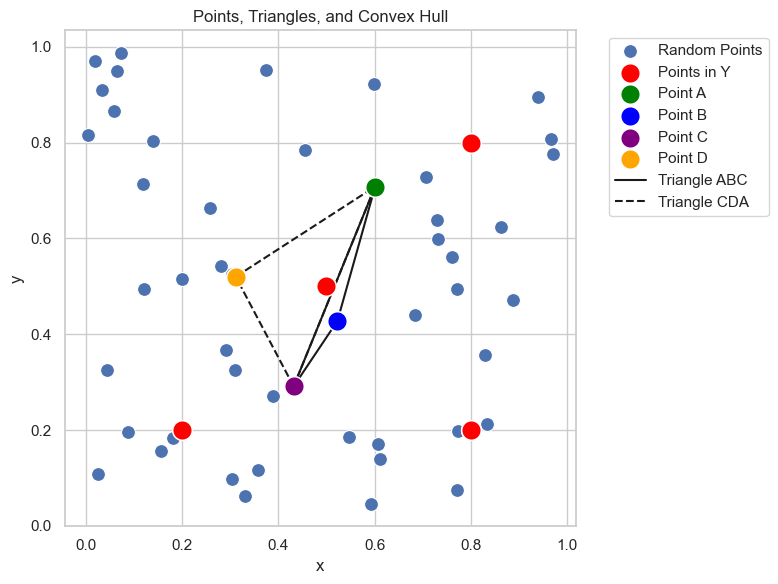

In [ ]:
# Set the seed for reproducibility
np.random.seed(42)

# Generate random points in the unit square
X = np.random.uniform(size=(50, 2))

# Define the set Y of points within the unit square
Y = np.array([(0.2, 0.2), (0.8, 0.2), (0.8, 0.8), (0.8, 0.2), (0.5, 0.5)])

# Function to find the closest point satisfying the condition
def find_point(X, y, condition):
    distances = np.sqrt(np.sum((X - y) ** 2, axis=1))
    valid_points = X[condition(X, y)]
    if len(valid_points) == 0:
        return None
    return valid_points[np.argmin(distances[condition(X, y)])]

# Conditions for points A, B, C, D
condition_A = lambda X, y: (X[:, 0] > y[0]) & (X[:, 1] > y[1])
condition_B = lambda X, y: (X[:, 0] > y[0]) & (X[:, 1] < y[1])
condition_C = lambda X, y: (X[:, 0] < y[0]) & (X[:, 1] < y[1])
condition_D = lambda X, y: (X[:, 0] < y[0]) & (X[:, 1] > y[1])

# Function to calculate barycentric coordinates
def barycentric_coords(p, a, b, c):
    denom = (b[1] - c[1]) * (a[0] - c[0]) + (c[0] - b[0]) * (a[1] - c[1])
    lambda1 = ((b[1] - c[1]) * (p[0] - c[0]) + (c[0] - b[0]) * (p[1] - c[1])) / denom
    lambda2 = ((c[1] - a[1]) * (p[0] - c[0]) + (a[0] - c[0]) * (p[1] - c[1])) / denom
    lambda3 = 1 - lambda1 - lambda2
    return lambda1, lambda2, lambda3

# Function to compute f(x, y)
def f(x, y):
    return x**2 + y**2

# Initialize lists to store results
true_values = []
approximated_values = []

# Process each point in Y
for y in Y:
    # Find points A, B, C, D for the current point y
    A = find_point(X, y, condition_A)
    B = find_point(X, y, condition_B)
    C = find_point(X, y, condition_C)
    D = find_point(X, y, condition_D)
    
    # Compute true value of f(y)
    true_value = f(y[0], y[1])
    
    # Compute barycentric coordinates for triangles ABC and CDA
    bary_coords_ABC = barycentric_coords(y, A, B, C) if A is not None and B is not None and C is not None else (None, None, None)
    bary_coords_CDA = barycentric_coords(y, C, D, A) if C is not None and D is not None and A is not None else (None, None, None)
    
    # Function to approximate f(y) using barycentric coordinates
    def approximate_f(bary_coords, vertices):
        return sum(lambda_i * f(v[0], v[1]) for lambda_i, v in zip(bary_coords, vertices))
    
    # Approximate f(y) using both triangles ABC and CDA
    approx_ABC = approximate_f(bary_coords_ABC, [A, B, C]) if None not in bary_coords_ABC else None
    approx_CDA = approximate_f(bary_coords_CDA, [C, D, A]) if None not in bary_coords_CDA else None
    
    # Determine which triangle contains y and use that approximation
    approx_value = None
    if all(0 <= bc <= 1 for bc in bary_coords_ABC if bc is not None):
        approx_value = approx_ABC
    elif all(0 <= bc <= 1 for bc in bary_coords_CDA if bc is not None):
        approx_value = approx_CDA
    
    # Store results
    true_values.append(true_value)
    approximated_values.append(approx_value)

# Filter out None values from the results
true_values = np.array(true_values)
approximated_values = np.array([val for val in approximated_values if val is not None])

# Calculate mean squared error only for valid approximations
valid_indices = [i for i, val in enumerate(approximated_values) if val is not None]
valid_true_values = true_values[valid_indices]
valid_approximated_values = approximated_values[valid_indices]

# Calculate mean squared error
mse = np.mean((valid_true_values - valid_approximated_values)**2)

print("True values of f(y):", valid_true_values)
print("Approximated values of f(y):", valid_approximated_values)
print("Mean Squared Error:", mse)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a plot
plt.figure(figsize=(8, 6))

# Plot the random points
sns.scatterplot(x=X[:, 0], y=X[:, 1], label='Random Points', s=100, edgecolor="w")

# Plot the points in Y
sns.scatterplot(x=Y[:, 0], y=Y[:, 1], color='red', label='Points in Y', s=200, edgecolor="w", zorder=5)

# Plot points A, B, C, D
if A is not None:
    sns.scatterplot(x=[A[0]], y=[A[1]], color='green', label='Point A', s=200, edgecolor="w", zorder=5)
if B is not None:
    sns.scatterplot(x=[B[0]], y=[B[1]], color='blue', label='Point B', s=200, edgecolor="w", zorder=5)
if C is not None:
    sns.scatterplot(x=[C[0]], y=[C[1]], color='purple', label='Point C', s=200, edgecolor="w", zorder=5)
if D is not None:
    sns.scatterplot(x=[D[0]], y=[D[1]], color='orange', label='Point D', s=200, edgecolor="w", zorder=5)

# Plot triangles ABC and CDA
if A is not None and B is not None and C is not None:
    plt.plot([A[0], B[0]], [A[1], B[1]], 'k-')
    plt.plot([B[0], C[0]], [B[1], C[1]], 'k-')
    plt.plot([C[0], A[0]], [C[1], A[1]], 'k-', label='Triangle ABC')

if C is not None and D is not None and A is not None:
    plt.plot([C[0], D[0]], [C[1], D[1]], 'k--')
    plt.plot([D[0], A[0]], [D[1], A[1]], 'k--')
    plt.plot([A[0], C[0]], [A[1], C[1]], 'k--', label='Triangle CDA')


# Customize the plot
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Points, Triangles, and Convex Hull')
plt.grid(True)
plt.tight_layout()
plt.show()
